In [32]:
from bson import ObjectId
import numpy as np
import pymongo
import statistics
from sklearn import linear_model
import time
from matplotlib import pyplot as plt

In [45]:
# Connect to db, retrieve and format data

host="192.168.50.41"
port=27017
db_name='mt'
client = pymongo.MongoClient(host, port)
db = client[db_name]
datColl = db['enctest_dat']

testRecID = ObjectId("67169ea29acd6d58d443e9ab")

adc_bits = 2**14
adc_v = 5
adc_sense = adc_v/adc_bits
adc_mm = adc_sense * 2
vals_sense = []
vals_rh1 = []
vals_rh2 = []
vals_rh3 = []
for test_rec in datColl.find({"_id": testRecID}):
    for val in test_rec['vals_sense']:
        vals_sense.append(val * adc_mm)
    for val in test_rec['vals_rh1']:
        vals_rh1.append(val * adc_sense)
    for val in test_rec['vals_rh2']:
        vals_rh2.append(val * adc_sense)
    for val in test_rec['vals_rh3']:
        vals_rh3.append(val * adc_sense)
        
    print(max(test_rec['vals_sense']))
    # vals_sense = [i * adc_sense for i in test_rec['vals_sense']]
    # vals_rh1 = [i * adc_sense for i in test_rec['vals_rh1']]
    # vals_rh2 = [i * adc_sense for i in test_rec['vals_rh2']]
    # vals_rh3 = [i * adc_sense for i in test_rec['vals_rh3']]
    


1941312.0


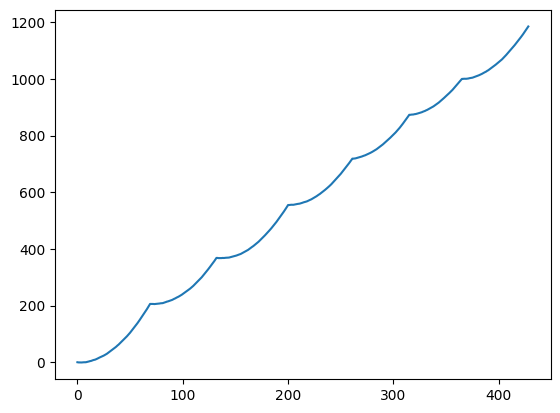

In [46]:
plt.plot(vals_sense)

In [43]:
print(2**14)

16384


In [24]:
bin_rh1 = []
bin_rh2 = []
bin_rh3 = []
for val in vals_rh1:
    if val > 2:
        bin_rh1.append(1)
    else:
        bin_rh1.append(0)
for val in vals_rh2:
    if val > 2:
        bin_rh2.append(1)
    else:
        bin_rh2.append(0)
for val in vals_rh3:
    if val > 2:
        bin_rh3.append(1)
    else:
        bin_rh3.append(0)

In [29]:
vals = np.linspace(0, len(vals_sense), len(vals_sense))
reg = linear_model.LinearRegression()
sub_t1 = np.array(vals)
sub_t2 = np.array(vals_sense)
sub_sense = np.array(vals_sense)
reg.fit(sub_t1.reshape((-1,1)), sub_sense)
print(f'Slope: {round(reg.coef_[0], 4)} mm/degC')
fit_points = []
for val in vals:
    fit_point = val * reg.coef_[0] + reg.intercept_
    fit_points.append(fit_point)

Slope: 1.6394 mm/degC


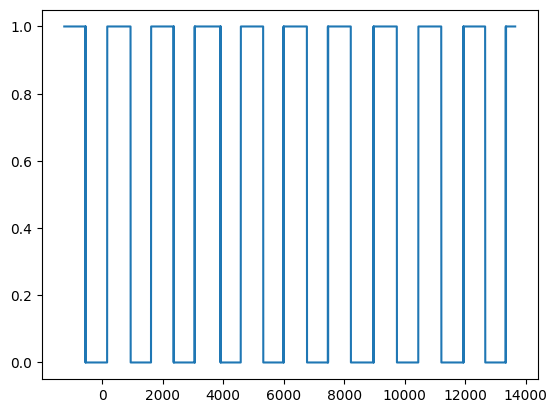

In [30]:
plt.plot(fit_points, bin_rh1)

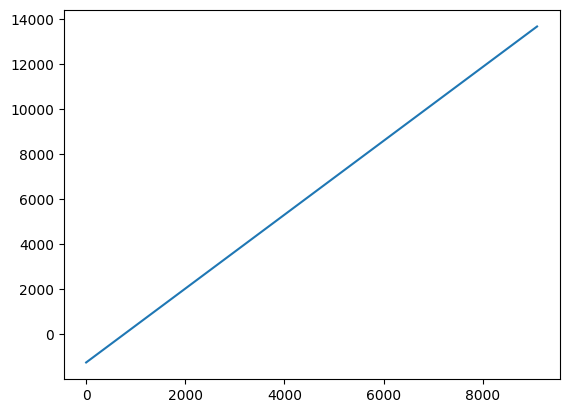

In [28]:
plt.plot(vals, fit_points)

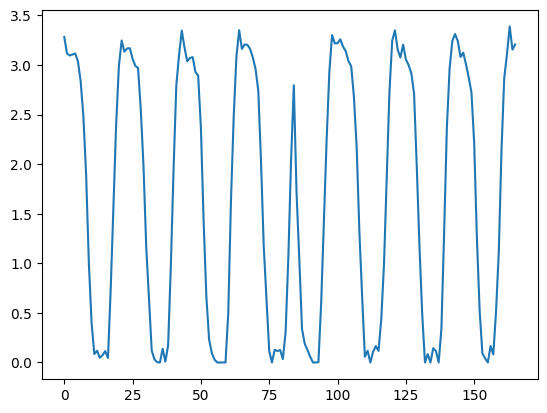

In [44]:
plt.plot(vals_rh1)

In [47]:
print(2**14)

16384
